In [70]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
f = pd.read_csv("fruit.txt",sep="\t")
f

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [72]:
f.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [73]:
f.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

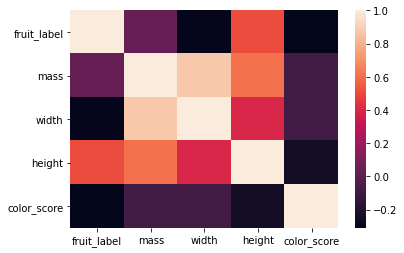

In [74]:
sns.heatmap(f.corr())

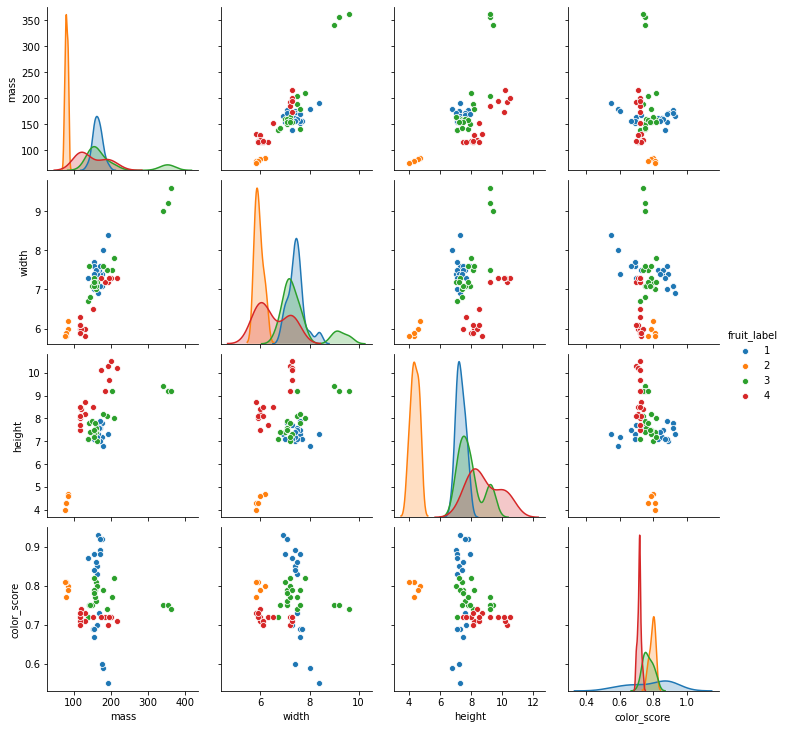

In [8]:
sns.pairplot(f,hue ="fruit_label")

In [75]:
f.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


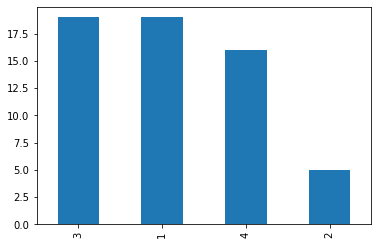

In [76]:
f['fruit_label'].value_counts().plot(kind = 'bar')

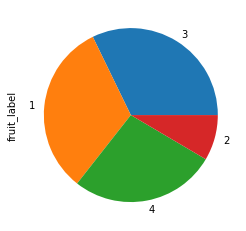

In [77]:
f['fruit_label'].value_counts().plot(kind = 'pie')

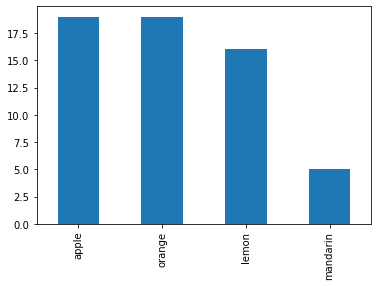

In [78]:
f['fruit_name'].value_counts().plot(kind = 'bar')

In [79]:
print(f"样本数: {len(f)}")

样本数: 59


In [80]:
f['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [81]:
fdict = dict(zip(f['fruit_label'],f['fruit_name']))
print(fdict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [82]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [83]:
x = f.loc[:,['mass','width','height','color_score']]
y = f.loc[:,'fruit_label']

In [84]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [85]:
x_tr

,mass,width,height,color_score
36,160,7.1,7.6,0.76
31,210,7.8,8.0,0.82
8,178,7.1,7.8,0.92
17,168,7.5,7.6,0.73
6,80,5.9,4.3,0.81
4,84,6.0,4.6,0.79
54,116,6.1,8.5,0.71
19,162,7.4,7.2,0.85
30,158,7.1,7.5,0.79
50,130,6.0,8.2,0.71


In [86]:
y_tr

36    3
31    3
8     1
17    1
6     2
4     2
54    4
19    1
30    3
50    4
44    4
55    4
15    1
9     1
27    3
26    3
16    1
24    3
33    3
56    4
41    3
11    1
32    3
52    4
40    3
37    3
29    3
43    4
1     1
21    1
2     1
46    4
39    3
35    3
23    1
48    4
10    1
22    1
18    1
58    4
20    1
7     2
42    3
14    1
28    3
51    4
38    3
Name: fruit_label, dtype: int64

In [87]:
x_te

,mass,width,height,color_score
0,192,8.4,7.3,0.55
5,80,5.8,4.3,0.77
34,142,7.6,7.8,0.75
13,164,7.3,7.7,0.70
45,186,7.2,9.2,0.72
53,120,6.0,8.4,0.74
57,152,6.5,8.5,0.72
25,356,9.2,9.2,0.75
47,196,7.3,9.7,0.72
12,154,7.0,7.1,0.88


In [88]:
y_te

0     1
5     2
34    3
13    1
45    4
53    4
57    4
25    3
47    4
12    1
49    4
3     2
Name: fruit_label, dtype: int64

In [89]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [90]:
ss = StandardScaler()
mm = MinMaxScaler()

In [91]:
x_tr_ss = ss.fit_transform(x_tr)
x_tr_mm = mm.fit_transform(x_tr)
x_te_ss = ss.transform(x_te)
x_te_mm = ss.transform(x_te)

In [93]:
x_tr_ss

array([[-6.07385839e-02, -3.40220582e-02, -6.87308306e-02,
        -1.29490670e-01],
       [ 9.30481361e-01,  8.98749370e-01,  2.46425173e-01,
         6.64343438e-01],
       [ 2.96100596e-01, -3.40220582e-02,  8.88471712e-02,
         1.98740029e+00],
       [ 9.78566074e-02,  4.98990186e-01, -6.87308306e-02,
        -5.26407724e-01],
       [-1.64669050e+00, -1.63305879e+00, -2.66876786e+00,
         5.32037753e-01],
       [-1.56739290e+00, -1.49980573e+00, -2.43240086e+00,
         2.67426384e-01],
       [-9.33012136e-01, -1.36655267e+00,  6.40370177e-01,
        -7.91019094e-01],
       [-2.10897861e-02,  3.65737125e-01, -3.83886834e-01,
         1.06126049e+00],
       [-1.00387382e-01, -3.40220582e-02, -1.47519831e-01,
         2.67426384e-01],
       [-6.55470551e-01, -1.49980573e+00,  4.04003175e-01,
        -7.91019094e-01],
       [ 7.32237372e-01,  2.32484064e-01,  2.21615020e+00,
        -6.58713409e-01],
       [-9.33012136e-01, -1.10004655e+00,  1.00581703e-02,
      

In [94]:
x_tr_mm

array([[0.29370629, 0.34210526, 0.55384615, 0.5       ],
       [0.46853147, 0.52631579, 0.61538462, 0.67647059],
       [0.35664336, 0.34210526, 0.58461538, 0.97058824],
       [0.32167832, 0.44736842, 0.55384615, 0.41176471],
       [0.01398601, 0.02631579, 0.04615385, 0.64705882],
       [0.02797203, 0.05263158, 0.09230769, 0.58823529],
       [0.13986014, 0.07894737, 0.69230769, 0.35294118],
       [0.3006993 , 0.42105263, 0.49230769, 0.76470588],
       [0.28671329, 0.34210526, 0.53846154, 0.58823529],
       [0.18881119, 0.05263158, 0.64615385, 0.35294118],
       [0.43356643, 0.39473684, 1.        , 0.38235294],
       [0.13986014, 0.13157895, 0.56923077, 0.38235294],
       [0.27972028, 0.5       , 0.47692308, 0.29411765],
       [0.33566434, 0.42105263, 0.46153846, 0.88235294],
       [0.44755245, 0.44736842, 0.8       , 0.52941176],
       [1.        , 1.        , 0.8       , 0.44117647],
       [0.27972028, 0.47368421, 0.53846154, 0.23529412],
       [0.93006993, 0.84210526,

In [95]:
x_te_ss

array([[ 5.73642181e-01,  1.69826774e+00, -3.05097833e-01,
        -2.90791005e+00],
       [-1.64669050e+00, -1.76631185e+00, -2.66876786e+00,
         2.81501457e-03],
       [-4.17577764e-01,  6.32243248e-01,  8.88471712e-02,
        -2.61796355e-01],
       [ 1.85590117e-02,  2.32484064e-01,  1.00581703e-02,
        -9.23324778e-01],
       [ 4.54695788e-01,  9.92310030e-02,  1.19189318e+00,
        -6.58713409e-01],
       [-8.53714540e-01, -1.49980573e+00,  5.61581177e-01,
        -3.94102040e-01],
       [-2.19333775e-01, -8.33540425e-01,  6.40370177e-01,
        -6.58713409e-01],
       [ 3.82484360e+00,  2.76429223e+00,  1.19189318e+00,
        -2.61796355e-01],
       [ 6.52939777e-01,  2.32484064e-01,  1.58583819e+00,
        -6.58713409e-01],
       [-1.79684977e-01, -1.67275119e-01, -4.62675835e-01,
         1.45817755e+00],
       [-6.15821753e-01, -1.76631185e+00,  7.97948179e-01,
        -5.26407724e-01],
       [-1.52774410e+00, -1.23329961e+00, -2.35361186e+00,
      

In [96]:
x_te_mm

array([[ 5.73642181e-01,  1.69826774e+00, -3.05097833e-01,
        -2.90791005e+00],
       [-1.64669050e+00, -1.76631185e+00, -2.66876786e+00,
         2.81501457e-03],
       [-4.17577764e-01,  6.32243248e-01,  8.88471712e-02,
        -2.61796355e-01],
       [ 1.85590117e-02,  2.32484064e-01,  1.00581703e-02,
        -9.23324778e-01],
       [ 4.54695788e-01,  9.92310030e-02,  1.19189318e+00,
        -6.58713409e-01],
       [-8.53714540e-01, -1.49980573e+00,  5.61581177e-01,
        -3.94102040e-01],
       [-2.19333775e-01, -8.33540425e-01,  6.40370177e-01,
        -6.58713409e-01],
       [ 3.82484360e+00,  2.76429223e+00,  1.19189318e+00,
        -2.61796355e-01],
       [ 6.52939777e-01,  2.32484064e-01,  1.58583819e+00,
        -6.58713409e-01],
       [-1.79684977e-01, -1.67275119e-01, -4.62675835e-01,
         1.45817755e+00],
       [-6.15821753e-01, -1.76631185e+00,  7.97948179e-01,
        -5.26407724e-01],
       [-1.52774410e+00, -1.23329961e+00, -2.35361186e+00,
      

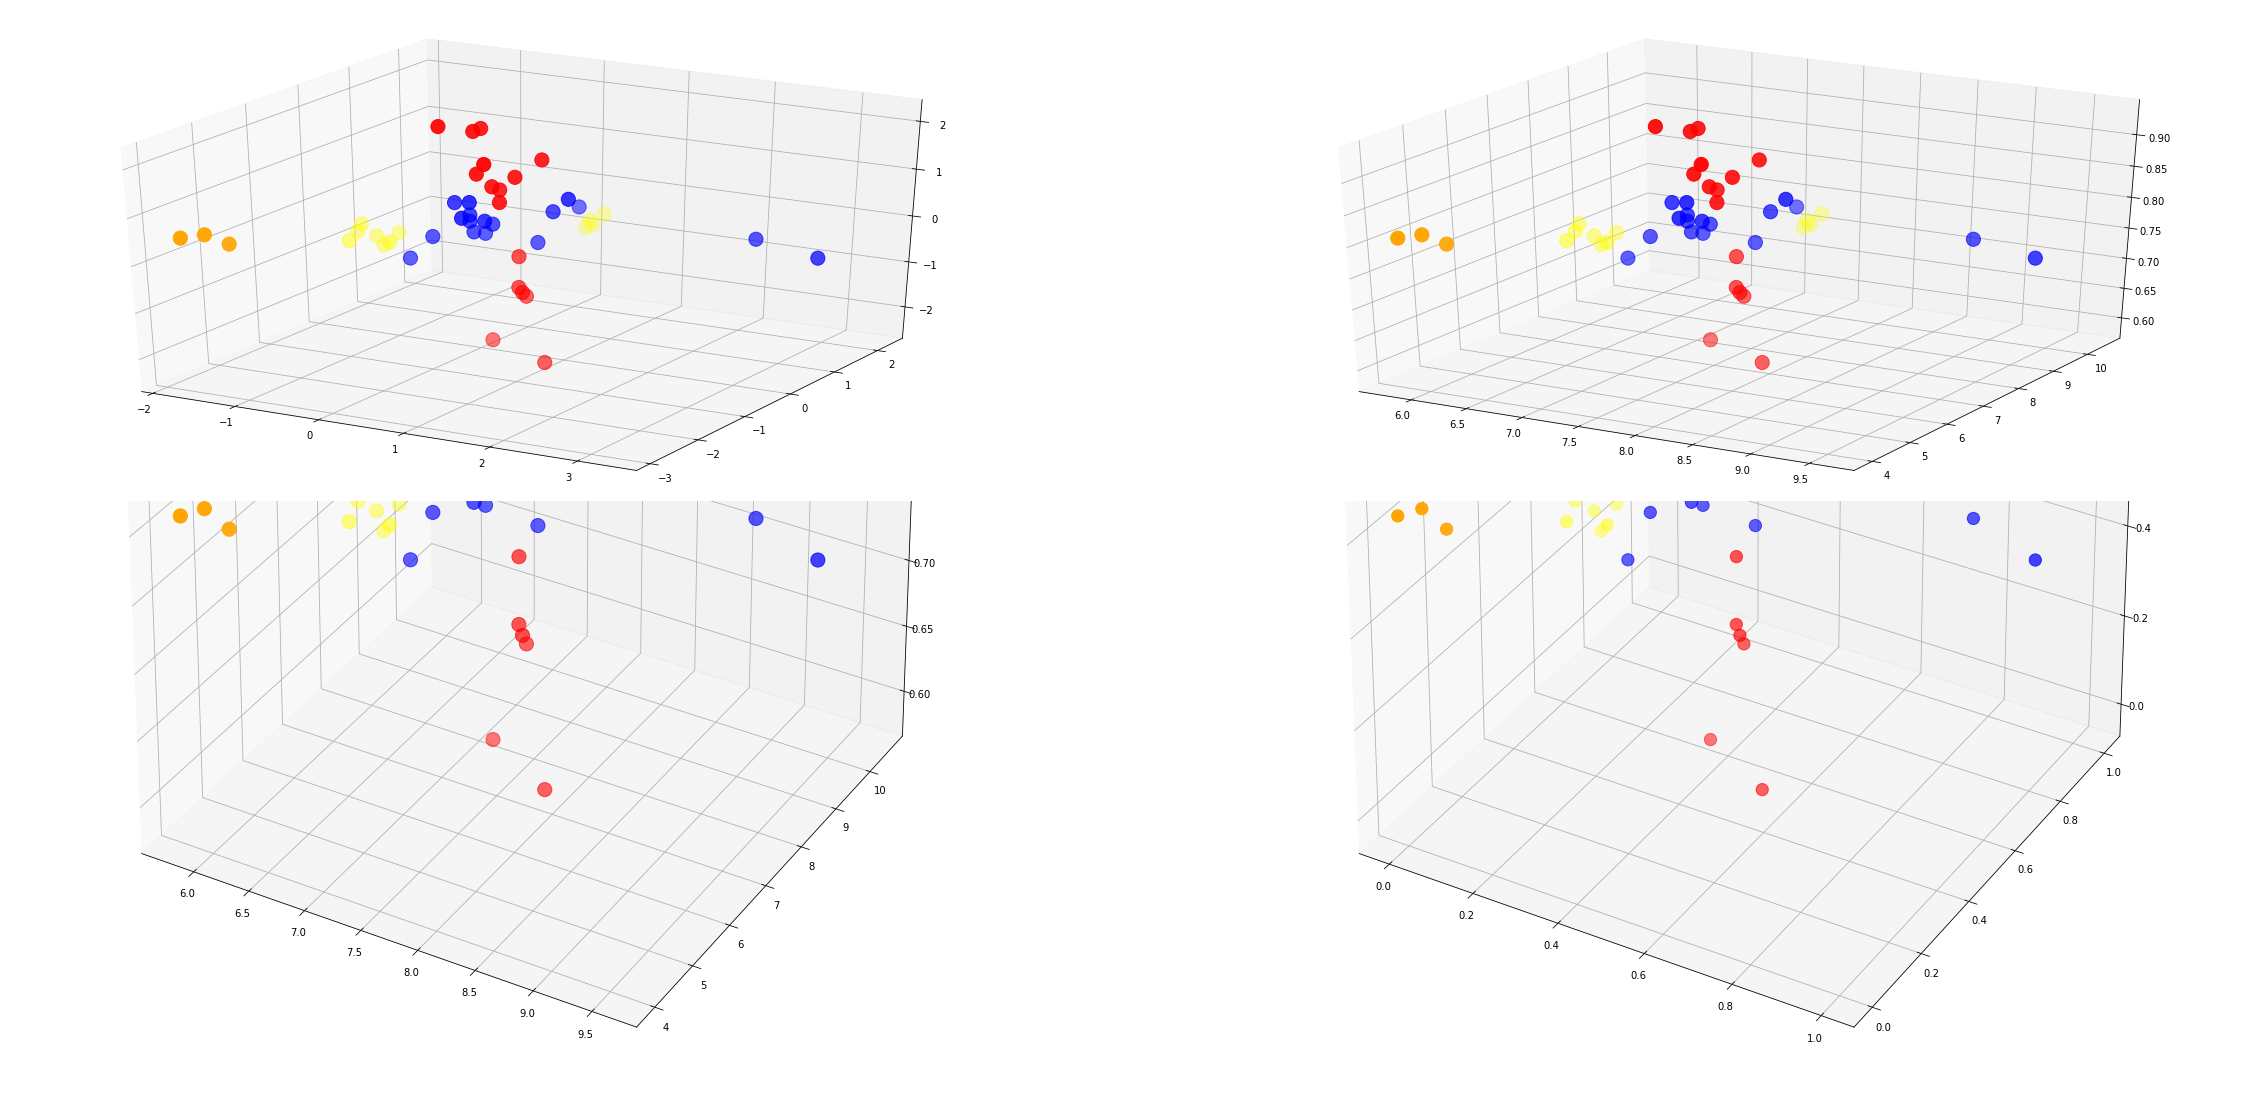

In [140]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (40,20))
ax1 = fig.add_subplot(121,projection = '3d')
fdictt = {1: 'red', 2: 'orange', 3: 'blue', 4: 'yellow'}
color = y_tr.map(fdictt)
colors = list(map(lambda x:fdictt[x],y_tr))


ax1.scatter(x_tr['width'],
                  x_tr['height'],
                  x_tr['color_score'],
                  c = color,
                  marker = 'o',
                  s = 200)

# fig.subplots_adjust(hspace = 0.5,wspace = 0.5)

ax2 = fig.add_subplot(122,projection = '3d')
ax2.scatter(x_tr_mm[:,1],
            x_tr_mm[:,2],
            x_tr_mm[:,3],
            c = colors,
            marker = 'o',
            s = 150)

ax3 = fig.add_subplot(221,projection = '3d')
ax3.scatter(x_tr_ss[:,1],
            x_tr_ss[:,2],
            x_tr_ss[:,3],
            c = colors,
            marker = 'o',
            s = 200)

ax4 = fig.add_subplot(222,projection = '3d')
ax4.scatter(x_tr['width'],
                  x_tr['height'],
                  x_tr['color_score'],
                  c = color,
                  marker = 'o',
                  s = 200)

plt.show()

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pre = lr.predict(x_te)
print(classification_report(y_te,y_pre))
print(lr.score(x_te,y_te))
print(lr.score(x_te_mm,y_te))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         2
           3       0.33      0.50      0.40         2
           4       1.00      0.80      0.89         5

    accuracy                           0.75        12
   macro avg       0.75      0.74      0.74        12
weighted avg       0.81      0.75      0.77        12

0.75
0.4166666666666667


In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [187]:
knn = KNeighborsClassifier(n_neighbors=5)

In [188]:
knn.fit(x_tr,y_tr)
knn.fit(x_tr_mm,y_tr)
print(f"归一化前: {knn.score(x_te,y_te)}")
print(f"归一化后: {knn.score(x_te_mm,y_te)}")

归一化前: 0.16666666666666666
归一化后: 0.8333333333333334


In [189]:
params = {"n_neighbors":[1,2,3,4,5,6,7,8,9]}

In [190]:
grid = GridSearchCV(estimator= knn,
                    param_grid=params,
                    cv = 10)

In [191]:
grid.fit(x_tr,y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [192]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [193]:
grid.best_params_

{'n_neighbors': 3}

In [194]:
a = grid.best_score_

In [195]:
grid.fit(x_tr_mm,y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [196]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [197]:
grid.best_params_

{'n_neighbors': 1}

In [198]:
b = grid.best_score_

In [199]:
print(f"最优超参数归一化前: {a}")
print(f"最优超参数归一化后: {b}")

最优超参数归一化前: 0.7
最优超参数归一化后: 0.96


In [207]:
dt = DecisionTreeClassifier(max_depth=3,
                            min_samples_leaf=3,
                            min_samples_split=3)
dt.fit(x_tr,y_tr)
dt.fit(x_te_mm,y_te)
print(f"归一化前: {dt.score(x_te,y_te)}")
print(f"归一化后: {dt.score(x_te_mm,y_te)}")

归一化前: 0.16666666666666666
归一化后: 0.75


In [211]:
params = {"max_depth":[3,4,5,6,7,8],
          "min_samples_leaf":[2,3,4,5,6,7,8,9],
          "min_samples_split":[2,3,4,5,6,7,8]}

In [212]:
grid1 = GridSearchCV(estimator = dt,
                     param_grid = params,
                     cv = 5)

In [214]:
grid1.fit(x_tr,y_tr)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                              min_samples_split=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [215]:
grid1.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [217]:
a = grid1.best_score_

In [218]:
grid1.fit(x_tr_mm,y_tr)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                              min_samples_split=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [219]:
grid1.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [220]:
b = grid1.best_score_

In [222]:
print(f"归一化前: {dt.score(x_te,y_te)}")
print(f"归一化后: {dt.score(x_te_mm,y_te)}")
print(f"最优超参数归一化前: {a}")
print(f"最优超参数归一化后: {b}")

归一化前: 0.16666666666666666
归一化后: 0.75
最优超参数归一化前: 0.8933333333333333
最优超参数归一化后: 0.9155555555555555


In [224]:
from sklearn.svm import SVC,SVR

In [225]:
svc = SVC(C=1.0)

In [226]:
svc.fit(x_tr,y_tr)

SVC()

In [227]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder

In [228]:
la = LabelBinarizer()
oh = OneHotEncoder()

In [230]:
x_train = np.array([['male', 'low'],
                  ['female', 'low'],
                  ['female', 'middle'],
                  ['male', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['female', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['male', 'high']])

x_test = np.array([['male', 'low'],
                  ['male', 'low'],
                  ['female', 'middle'],
                  ['female', 'low'],
                  ['female', 'high']]) 

In [256]:
x_tr_0 = la.fit_transform(x_train[:,0])
x_tr_0

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [257]:
x_tr_1 = la.fit_transform(x_train[:,1])
x_tr_1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [265]:
x_te_0 = la.transform(x_test[:,0])
x_te_0

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [264]:
x_te_1 = la.transform(x_test[:,1])
x_te_1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [246]:
print(oh.fit_transform(x_train))

  (0, 1)	1.0
  (0, 3)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0
  (4, 0)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (6, 3)	1.0
  (7, 0)	1.0
  (7, 2)	1.0
  (8, 1)	1.0
  (8, 3)	1.0
  (9, 1)	1.0
  (9, 2)	1.0


In [263]:
print(oh.transform(x_test))

  (0, 1)	1.0
  (0, 3)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (4, 0)	1.0
  (4, 2)	1.0


In [260]:
oh.fit_transform(x_train).todense()

matrix([[0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1.],
        [0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0.]])

In [262]:
oh.transform(x_test).todense()

matrix([[0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        [1., 0., 1., 0., 0.]])

In [ ]:
from mlxtend.classifier import 